<a href="https://colab.research.google.com/github/ChristopherParrisMD/TabPFN-Benchmark-Project/blob/main/Mushroom_tabpfn_vs_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


In [12]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

df = pd.read_csv(url, names=columns)

In [13]:
# Missing Values
df = df.replace('?', 'missing')

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
# Handle missing values
df = df.replace('?', 'missing')

In [16]:
# Encode all categorical features
X = df.drop("class", axis=1)
y = df["class"].map({'e': 0, 'p': 1})  # edible = 0, poisonous = 1

encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
import os
os.environ['TABPFN_ALLOW_CPU_LARGE_DATASET'] = '1'

In [19]:
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch

clf = TabPFNClassifier(device='cpu', ignore_pretraining_limits=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("TabPFN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tabpfn-v2-classifier-finetuned-zk73skhh.(…):   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

TabPFN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [21]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



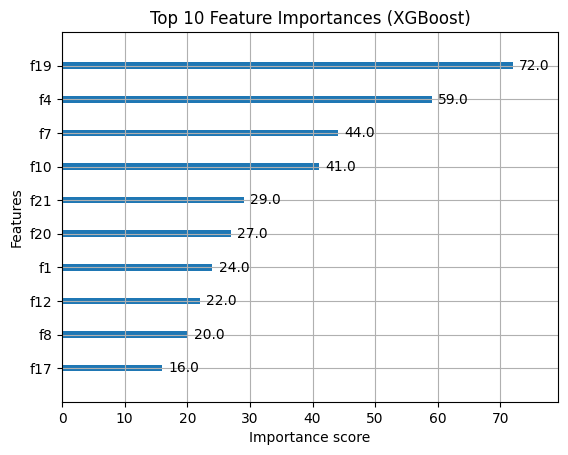

In [22]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


In [23]:
feature_names = X.columns.tolist()

for i in [19, 4, 7, 10, 21, 20, 1, 12, 8, 17]:
    print(f"f{i} =", feature_names[i])


f19 = spore-print-color
f4 = odor
f7 = gill-size
f10 = stalk-root
f21 = habitat
f20 = population
f1 = cap-surface
f12 = stalk-surface-below-ring
f8 = gill-color
f17 = ring-number
